In [1]:
import pandas as pd

#pd.options.display.max_rows = 2
data = pd.read_csv("ex00/life_expectancy_years.csv", index_col='country')
print(data.shape)
print(data.head(2))

(195, 301)
             1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  ...  \
country                                                                  ...   
Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  28.1  ...   
Angola       27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...   

             2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
country                                                                  
Afghanistan  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
Angola       78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  

[2 rows x 301 columns]


In [4]:
import pandas as pd
from pandas import DataFrame


def load(path: str) -> DataFrame:
    if path.endswith(".csv") is False:
        print("Most be .csv file extension!")
        return None
    try:
        pd.options.display.max_rows = 1
        data = pd.read_csv(path, index_col='country')
        print(f"Loading dataset of dimensions {data.shape}")
        return data
    except Exception as e:
        print(e)
    return None

In [2]:
import matplotlib.pyplot as plt

df = load("life_expectancy_years.csv")
country = "Brazil"
br_data = df.loc[country]
br_data.plot()
plt.title(f'{country} Life expectancy Projections')
plt.ylabel('Life expectancy')
plt.xlabel('Year')
plt.show()
# np_ar = br_data.to_numpy()
# print(np_ar)

NameError: name 'load' is not defined

In [54]:
def format_population(x, pos):
    if x >= 1e9:
        return f'{x/1e9}B'
    elif x >= 1e6:
        return f'{x/1e6}M'
    elif x >= 1e3:
        return f'{x/1e3}K'
    return f'{x}'


Loading dataset of dimensions (197, 301)


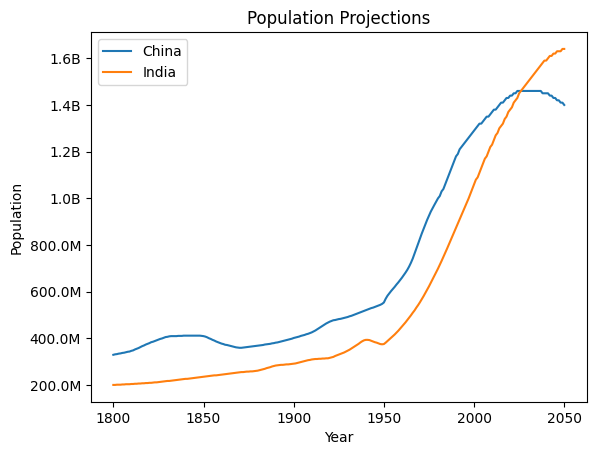

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# https://www.skytowner.com/explore/converting_k_and_m_to_numerical_form_in_pandas_dataframe
df = load("population_total.csv")
my_campus = "China"
other = "India"
conversions = {"k":"*1e3", "M":"*1e6", "B": "*1e9"}
br_data = df.loc[my_campus].replace(conversions, regex=True).map(pd.eval).astype(int)
other_data = df.loc[other].replace(conversions, regex=True).map(pd.eval).astype(int)

br_data['1800':'2050'].plot(label=my_campus)
other_data['1800':'2050'].plot(label=other)

plt.title(f'Population Projections')
plt.ylabel('Population')
plt.xlabel('Year')
plt.legend()

# format absolut numbers to 
formatter = mtick.FuncFormatter(format_population)
plt.gca().yaxis.set_major_formatter(formatter)

# locator = mtick.MultipleLocator(20e6)
# plt.gca().yaxis.set_major_locator(locator)

plt.show()

In [ ]:
# https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/